In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("data/House_1_feature_engineered.csv")
df.head()


,Time,Unix,Aggregate,Fridge,Freezer,Washing_Machine,Dishwasher,Computer,Television,Microwave,...,day,weekday,month,total_appliance_load,mean_appliance_load,max_appliance_load,lag1,lag24,rolling_mean_3,rolling_mean_24
0,2013-10-09 15:17:44,1381331864,166,72,48,0,0,0,0,0,...,9,2,10,121,13.444444,72,158.0,523.0,164.666667,337.833333
1,2013-10-09 15:18:45,1381331925,198,72,48,0,0,0,0,0,...,9,2,10,121,13.444444,72,166.0,561.0,174.000000,322.708333
2,2013-10-09 15:19:44,1381331984,197,72,48,0,0,0,0,0,...,9,2,10,121,13.444444,72,198.0,445.0,187.000000,312.375000
3,2013-10-09 15:20:45,1381332045,180,71,47,0,0,0,0,0,...,9,2,10,119,13.222222,71,197.0,613.0,191.666667,294.333333
4,2013-10-09 15:21:46,1381332106,168,71,47,0,0,0,0,0,...,9,2,10,119,13.222222,71,180.0,536.0,181.666667,279.000000


In [3]:
df.shape


(269635, 24)

In [4]:
# Drop non-numeric time column if present
if 'Time' in df.columns:
    df.drop(columns=['Time'], inplace=True)


In [5]:
df.dtypes


Unix                      int64
Aggregate                 int64
Fridge                    int64
Freezer                   int64
Washing_Machine           int64
Dishwasher                int64
Computer                  int64
Television                int64
Microwave                 int64
Kettle                    int64
Toaster                   int64
active_count              int64
hour                      int64
day                       int64
weekday                   int64
month                     int64
total_appliance_load      int64
mean_appliance_load     float64
max_appliance_load        int64
lag1                    float64
lag24                   float64
rolling_mean_3          float64
rolling_mean_24         float64
dtype: object

In [6]:
y = df['Aggregate']
X = df.drop(columns=['Aggregate'])

X.shape, y.shape


((269635, 22), (269635,))

In [7]:
train_size = int(len(X) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]


In [8]:
df.columns


Index(['Unix', 'Aggregate', 'Fridge', 'Freezer', 'Washing_Machine',
       'Dishwasher', 'Computer', 'Television', 'Microwave', 'Kettle',
       'Toaster', 'active_count', 'hour', 'day', 'weekday', 'month',
       'total_appliance_load', 'mean_appliance_load', 'max_appliance_load',
       'lag1', 'lag24', 'rolling_mean_3', 'rolling_mean_24'],
      dtype='object')

In [9]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = baseline_model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(130.1952214296498, np.float64(408.13082619298825), 0.738110113598123)

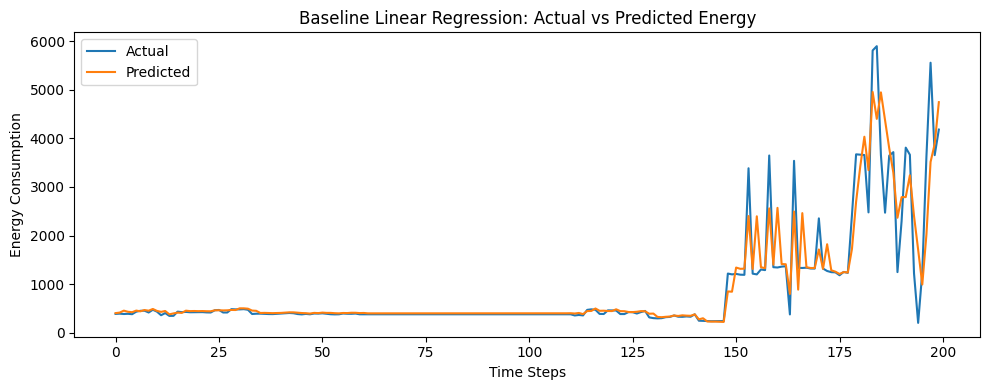

In [12]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title('Baseline Linear Regression: Actual vs Predicted Energy')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []

for train_idx, val_idx in tscv.split(X):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    y_val_pred = model.predict(X_val_cv)
    mae_scores.append(mean_absolute_error(y_val_cv, y_val_pred))


In [14]:
mae_scores
np.mean(mae_scores), np.std(mae_scores)


(np.float64(130.07365505296065), np.float64(38.14844167143264))

In [15]:
y_pred = baseline_model.predict(X_test)

baseline_mae = mean_absolute_error(y_test, y_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [16]:
mae_scores
np.mean(mae_scores), np.std(mae_scores)


(np.float64(130.07365505296065), np.float64(38.14844167143264))

In [17]:
baseline_mae
baseline_rmse


np.float64(408.13082619298825)

In [18]:
baseline_rmse 

np.float64(408.13082619298825)

In [19]:
baseline_mae

130.1952214296498

In [20]:
from sklearn.metrics import r2_score

baseline_r2 = r2_score(y_test, y_pred)
baseline_r2


0.738110113598123